# Fine Data Report 
## Finepayment Data Cologne 2016 & 2018:

The questions that interest us is: "Is there a change in car brands getting in fined or the fines getting paid? Does the car brand correlate with certain fines?"

The analysis helps to answer the question above.
The open source data from Mobilithek (datasets quoted below) of the city of Cologne from the years 2016 and 2018 is used, in particular data of the month january.

### Datasource 1: Bußgelddaten Koeln / Finepayment Data Cologne 2016
* Metadata URL: https://mobilithek.info/offers/-6868803491867755462
* Data URL: https://offenedaten-koeln.de/sites/default/files/Bussgeld_2016.csv
* Data Type: CSV

Data about fine penalty payment in regards of cars in the city in Cologne in january of the year 2016.

### Datasource 2: Bußgelddaten Koeln / Finepayment Data Cologne 2018
* Metadata URL: https://mobilithek.info/offers/-3334718157215585369
* Data URL: https://offenedaten-koeln.de/sites/default/files/Januar_2018.csv
* Data Type: CSV 

Data about fine penalty payment in regards of cars in the city in Cologne in january of the year 2018.


# 1. Data Pipeline

## Install dependencies
Initially, install all required dependencies. The specific version of SQLAlchemy is needed because SQLAlchemy 2.0 does not work with pandas yet. nbformat allows the use of the "notebook" formatter for the plot, others can not be rendered to HTML.

In [2]:
%pip install pandas
%pip install 'SQLAlchemy==1.4.46'
%pip install seaborn
%pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Load data
Extract data from the webpage and load it into the sql database "fine_data-sqlite" in the folder "data".

In [4]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv("https://offenedaten-koeln.de/sites/default/files/Bussgeld_2016.csv", delimiter=";")
df2 = pd.read_csv("https://offenedaten-koeln.de/sites/default/files/Januar_2018.csv", delimiter=";")

sink = sqlite3.connect("../data/fine_data.sqlite")


df1.to_sql("fine16", sink, if_exists="replace", index=False)
df2.to_sql("fine18", sink, if_exists="replace", index=False)

73226

### Testing
Test the absence of mistke by running the bash "test.sh" script which runs the python file "auto_testing.py", that checks the existence of the database and if the data extraction worked. 
A successful data extraction will show this phrase in the command line "Test result: No defects were dected sucessful". 
If the test dected some defects the following phrase will be displayed "Test result: Defects were detected".

### Dataframe 
Create a pandas dataframe using the local sqlite database files.

In [42]:
df16 = pd.read_sql_query('SELECT * FROM fine16', sink)
df18 = pd.read_sql_query('SELECT * FROM fine18', sink)

### Data Cleansing and Transformation
Look at the first few rows, get rid of incomplete data and transform the dataseta for further analyzation.

### Dataset 1

In [22]:
df16.head(10)

,jahr,monat,datum_von,kennzeichen1,fahrzeugart,fabrikat,strasse,hausnummer,tatbestand1,tatbestand2,tatbestand3
0,2016,1,2016-01-21 11:15:00.000,K,PKW,OPEL,FRANKFURTER STR.,70,141322,None,None
1,2016,1,2016-01-21 11:52:00.000,LEV,PKW,OPEL,GRAF-ADOLF-STR.,64,113140,None,None
2,2016,1,2016-01-21 10:28:00.000,K,PKW,JAGUAR,JAN-WELLEM-STR.,None,113140,None,None
3,2016,1,2016-01-21 10:20:00.000,K,PKW,FORD,JAN-WELLEM-STR.,None,113140,None,None
4,2016,1,2016-01-21 09:14:00.000,K,PKW,FORD,JAN-WELLEM-STR.,None,113140,None,None
5,2016,1,2016-01-21 08:33:00.000,K,PKW,VW-VOLKSWAGEN,GRONAUER STR.,43-45,112403,None,None
6,2016,1,2016-01-26 08:00:00.000,K,PKW,RENAULT,JOSEPHSKIRCHSTR.,58,142103,None,None
7,2016,1,2016-01-26 07:24:00.000,K,PKW,FIAT,WIPPERFÜRTHER STR.,None,112402,None,None
8,2016,1,2016-01-25 16:23:00.000,K,PKW,MERCEDES,SIEVERSSTR.,36,141312,None,None
9,2016,1,2016-01-25 16:34:00.000,K,PKW,VOLVO,DILLENBURGER STR.,None,141621,None,None


In [16]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921353 entries, 0 to 921352
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   jahr          921353 non-null  int64 
 1   monat         921353 non-null  int64 
 2   datum_von     921353 non-null  object
 3   kennzeichen1  921338 non-null  object
 4   fahrzeugart   921353 non-null  object
 5   fabrikat      920202 non-null  object
 6   strasse       921353 non-null  object
 7   hausnummer    618864 non-null  object
 8   tatbestand1   921353 non-null  object
 9   tatbestand2   47189 non-null   object
 10  tatbestand3   3605 non-null    object
dtypes: int64(2), object(9)
memory usage: 77.3+ MB


We only want to use data from the month january so we drop all the other data. At the same time incomplete rows as well as unecessary information is dropped as well.

In [43]:
for number in range(2, 13): 
    df16 = df16[df16.monat != number]

df16 = df16.drop(["jahr", "monat", "datum_von", "tatbestand2", "tatbestand3","hausnummer", "kennzeichen1"], axis=1)
df16 = df16.dropna()
df16.describe()

,fahrzeugart,fabrikat,strasse,tatbestand1
count,80660,80660,80660,80660
unique,13,88,2328,243
top,PKW,VW-VOLKSWAGEN,NEUSSER STR.,113140
freq,78923,13712,2446,31548


Decision: Only look at the top 20 fines ("tatbstand1")/(brand).

In [57]:
query = '''
SELECT fahrzeugart AS model,
    fabrikat AS brand,
    strasse AS street, 
    tatbestand1 AS fine
FROM fine16
WHERE tatbestand1 IN (SELECT tatbestand1 FROM fine16 GROUP BY tatbestand1 ORDER BY COUNT(tatbestand1) desc LIMIT 20);
'''
df2016 = pd.read_sql_query(query, sink)
df2016.head(10)

,model,brand,street,fine
0,PKW,OPEL,FRANKFURTER STR.,141322
1,PKW,OPEL,GRAF-ADOLF-STR.,113140
2,PKW,JAGUAR,JAN-WELLEM-STR.,113140
3,PKW,FORD,JAN-WELLEM-STR.,113140
4,PKW,FORD,JAN-WELLEM-STR.,113140
5,PKW,VW-VOLKSWAGEN,GRONAUER STR.,112403
6,PKW,RENAULT,JOSEPHSKIRCHSTR.,142103
7,PKW,FIAT,WIPPERFÜRTHER STR.,112402
8,PKW,MERCEDES,SIEVERSSTR.,141312
9,PKW,VOLVO,DILLENBURGER STR.,141621


<Axes: xlabel='brand', ylabel='count'>

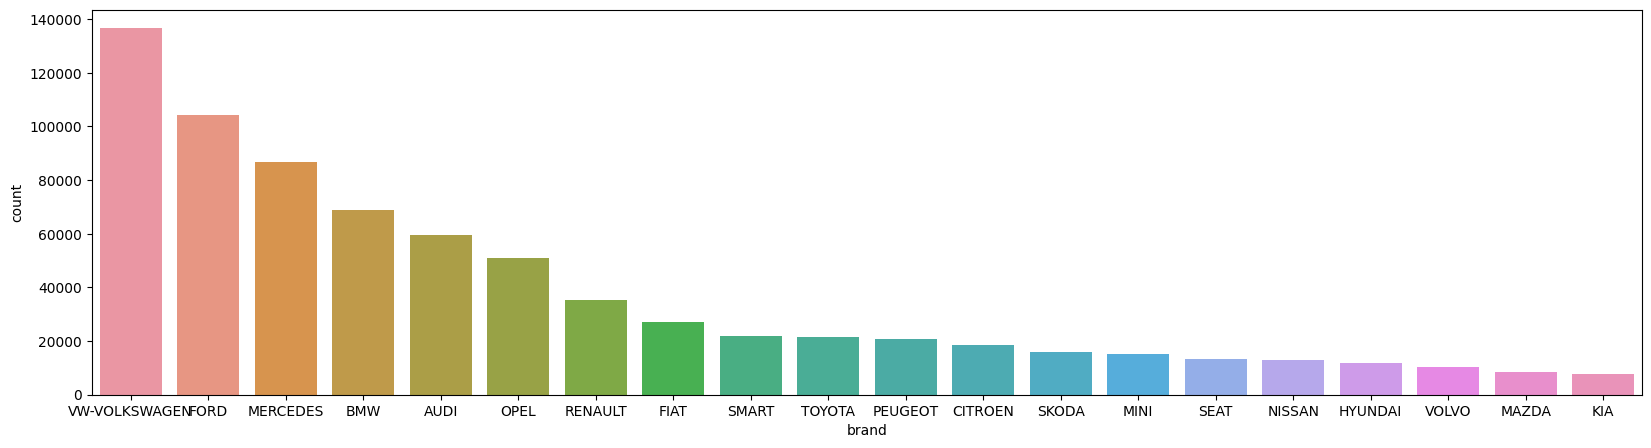

In [104]:
f,ax = plt.subplots(figsize=(20,5))
sns.countplot(x = 'brand', data = df2016, order=df2016['brand'].value_counts().head(20).index)

<Axes: xlabel='fine', ylabel='count'>

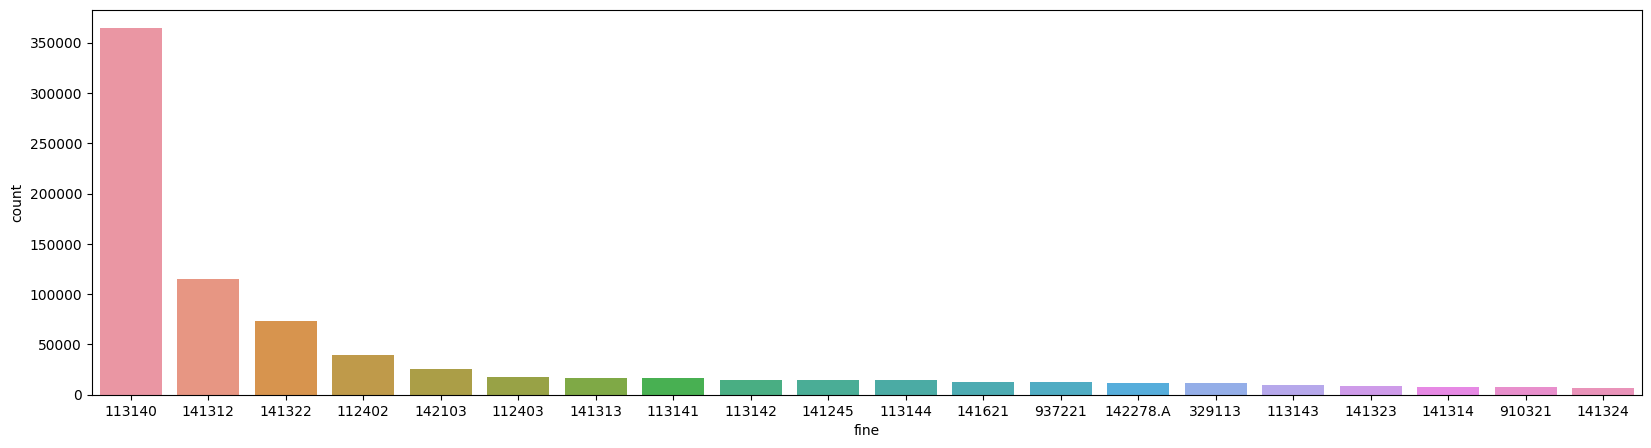

In [105]:
f,ax = plt.subplots(figsize=(20,5))
sns.countplot(x = 'fine', data = df2016, order=df2016['fine'].value_counts().head(20).index)

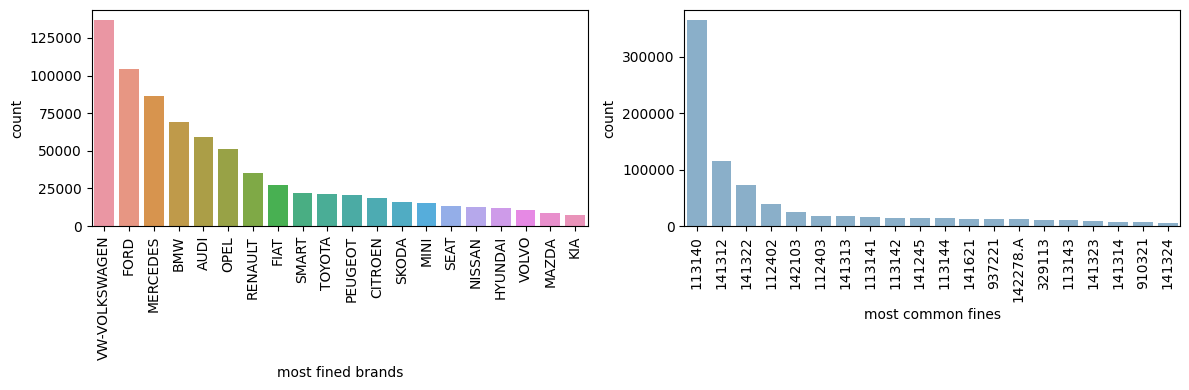

In [119]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x = 'brand', data = df2016, order=df2016['brand'].value_counts().head(20).index, ax=axes[0])
sns.countplot(x = 'fine', data = df2016, order=df2016['fine'].value_counts().head(20).index, ax=axes[1], color='#80B1D3')

axes[0].set_xlabel('most fined brands')
axes[1].set_xlabel("most common fines")

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation='vertical')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation='vertical')

plt.tight_layout()
plt.show()

             brand    fine  amount
363  VW-VOLKSWAGEN  113140   62613
78            FORD  113140   47225
154       MERCEDES  113140   37612
21             BMW  113140   31649
2             AUDI  113140   27507
..             ...     ...     ...
359          VOLVO  910321      75
126            KIA  141323      73
145          MAZDA  141323      67
150          MAZDA  910321      64
124            KIA  141314      60

[380 rows x 3 columns]


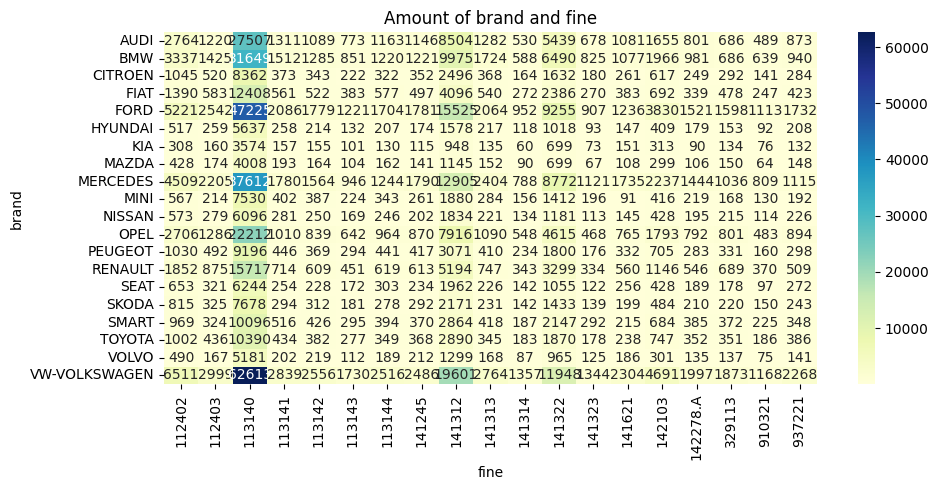

In [107]:
top_fines1 = df2016['fine'].value_counts().head(20).index
top_brands1 = df2016['brand'].value_counts().head(20).index

filtered16= df2016[df2016['fine'].isin(top_fines)]
filtered16= filtered16[filtered16['brand'].isin(top_brands)]

filtered16 = filtered16.groupby(['brand', 'fine']).size().reset_index(name='amount')
filtered16 = filtered16.sort_values('amount', ascending=False)

print(filtered16)

pivot_table1 = filtered16.pivot_table(values='amount', index='brand', columns='fine', fill_value=0)

plt.figure(figsize=(10, 5))
sns.heatmap(pivot_table1, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('fine')
plt.ylabel('brand')
plt.title('Amount of brand and fine')
plt.tight_layout()
plt.show()

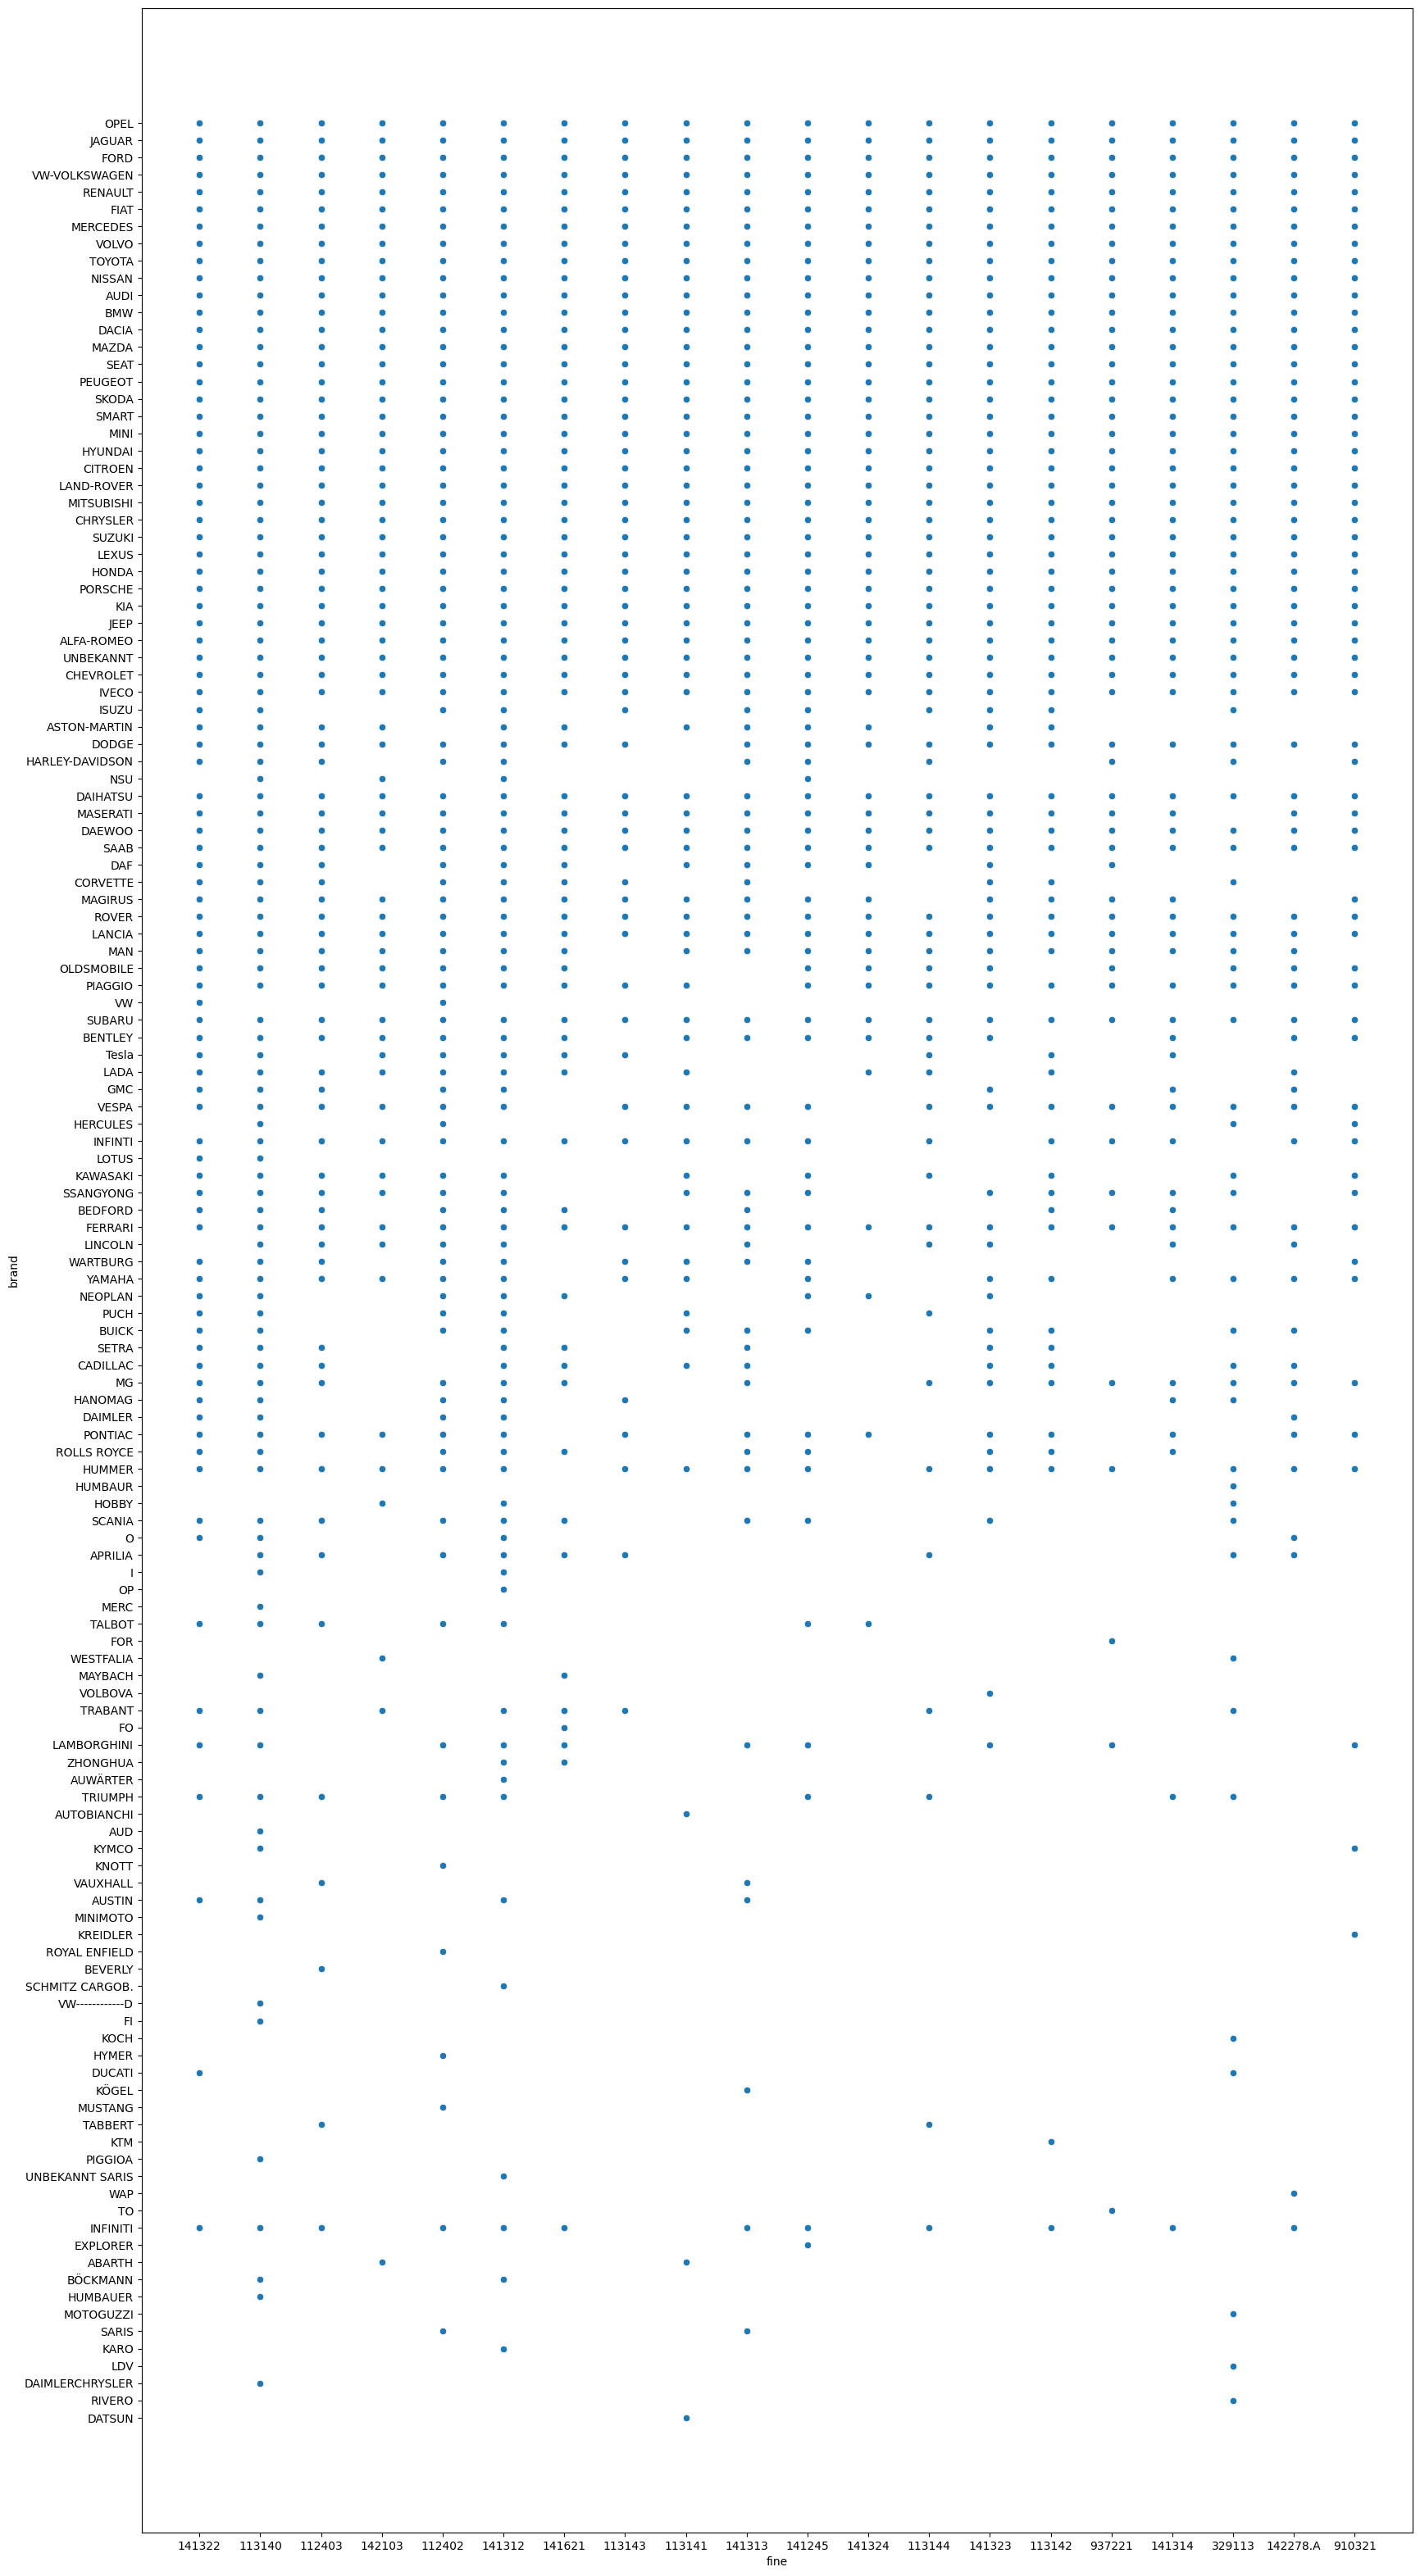

In [112]:
f,ax = plt.subplots(figsize=(20,40))
sns.scatterplot(x ='fine', y = 'brand', data = df2016, sizes=(1,10))
plt.show()

### Dataset 2

In [17]:
df18.head(10)

,datum_von,kennzeichen1,fahrzeugart,fabrikat,strasse,hausnummer,tatbestand1,tatbestand2,tatbestand3
0,2018-01-06 10:44:00.000,WÜ,PKW,AUDI,GUSTAVSTR.,56,141322,None,None
1,2018-01-06 10:44:00.000,BN,PKW,MAZDA,GUSTAVSTR.,56,141322,None,None
2,2018-01-06 10:38:00.000,NE,PKW,BMW,ZÜLPICHER STR.,311,141322,None,None
3,2018-01-06 10:40:00.000,K,PKW,HONDA,ZÜLPICHER STR.,None,141245,None,None
4,2018-01-29 10:48:00.000,K,PKW,RENAULT,BRÜSSELER STR.,None,113141,None,None
5,2018-01-29 10:48:00.000,BN,PKW,MERCEDES,BRÜSSELER STR.,None,113141,None,None
6,2018-01-29 10:45:00.000,HH,PKW,VW-VOLKSWAGEN,AACHENER STR.,33,141322,None,None
7,2018-01-29 10:32:00.000,K,PKW,AUDI,AACHENER STR.,None,141322,None,None
8,2018-01-29 10:45:00.000,K,PKW,BMW,AACHENER STR.,29,141322,None,None
9,2018-01-05 08:30:00.000,K,PKW,PEUGEOT,SÜLZBURGSTR.,172,141322,None,None


In [18]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73226 entries, 0 to 73225
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datum_von     73226 non-null  object
 1   kennzeichen1  73225 non-null  object
 2   fahrzeugart   73226 non-null  object
 3   fabrikat      73178 non-null  object
 4   strasse       73226 non-null  object
 5   hausnummer    49757 non-null  object
 6   tatbestand1   73226 non-null  object
 7   tatbestand2   4560 non-null   object
 8   tatbestand3   311 non-null    object
dtypes: object(9)
memory usage: 5.0+ MB


Incomplete rows as well as unecessary information is dropped.

In [20]:
df18 = df18.drop(["datum_von", "tatbestand2", "tatbestand3","hausnummer", "kennzeichen1"], axis=1)
df18 = df18.dropna()
df18.describe()

,fahrzeugart,fabrikat,strasse,tatbestand1
count,73178,73178,73178,73178
unique,15,86,2416,212
top,PKW,VW-VOLKSWAGEN,NEUSSER STR.,113140
freq,71139,12800,2368,27848


In [58]:
query1 = '''
SELECT fahrzeugart AS model,
    fabrikat AS brand,
    strasse AS street, 
    tatbestand1 AS fine
FROM fine18
WHERE tatbestand1 IN (SELECT tatbestand1 FROM fine18 GROUP BY tatbestand1 ORDER BY COUNT(tatbestand1) desc LIMIT 20);
'''
df2018 = pd.read_sql_query(query1, sink)
df2018.head(10)

,model,brand,street,fine
0,PKW,AUDI,GUSTAVSTR.,141322
1,PKW,MAZDA,GUSTAVSTR.,141322
2,PKW,BMW,ZÜLPICHER STR.,141322
3,PKW,HONDA,ZÜLPICHER STR.,141245
4,PKW,RENAULT,BRÜSSELER STR.,113141
5,PKW,MERCEDES,BRÜSSELER STR.,113141
6,PKW,VW-VOLKSWAGEN,AACHENER STR.,141322
7,PKW,AUDI,AACHENER STR.,141322
8,PKW,BMW,AACHENER STR.,141322
9,PKW,PEUGEOT,SÜLZBURGSTR.,141322


<Axes: xlabel='brand', ylabel='count'>

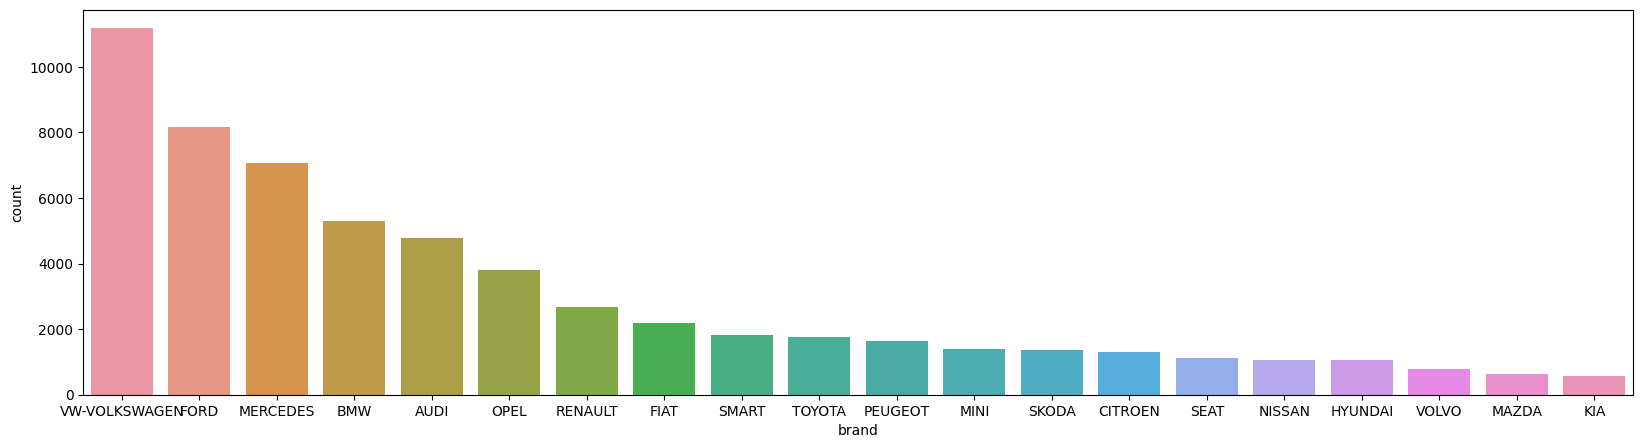

In [64]:
f,ax = plt.subplots(figsize=(20,5))
sns.countplot(x = 'brand', data = df2018, order=df2018['brand'].value_counts().head(20).index)

<Axes: xlabel='fine', ylabel='count'>

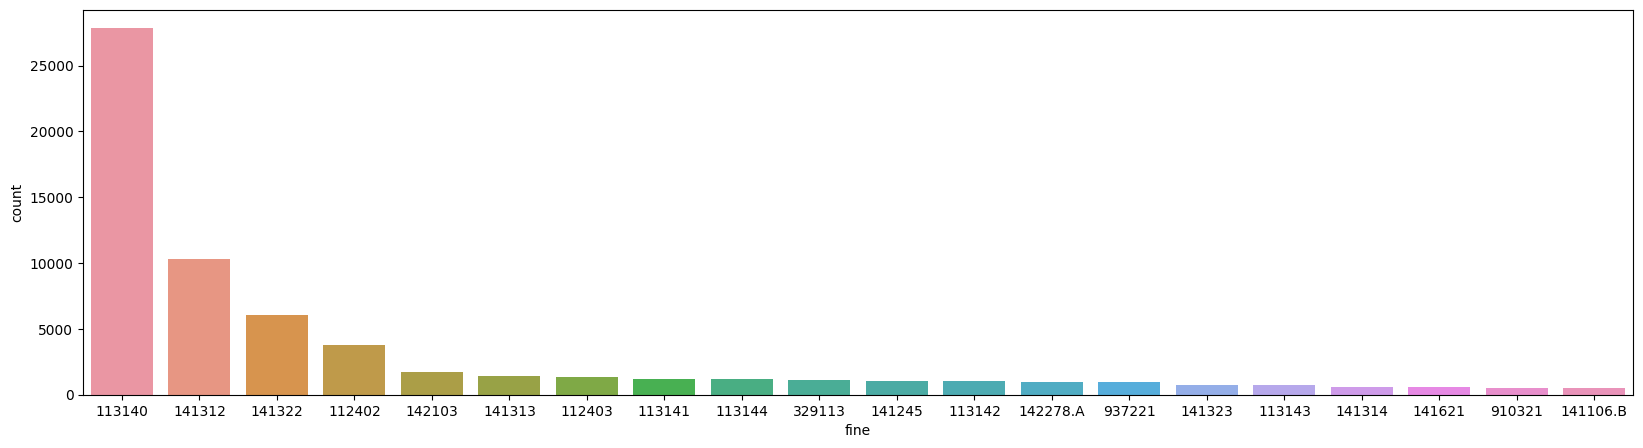

In [94]:
f,ax = plt.subplots(figsize=(20,5))
sns.countplot(x = 'fine', data = df2018, order=df2018['fine'].value_counts().head(20).index)

             brand      fine  amount
382  VW-VOLKSWAGEN    113140    4888
82            FORD    113140    3537
162       MERCEDES    113140    2910
22             BMW    113140    2299
2             AUDI    113140    2108
..             ...       ...     ...
114        HYUNDAI    141621       3
147          MAZDA  141106.B       2
154          MAZDA    141621       2
107        HYUNDAI  141106.B       2
127            KIA  141106.B       1

[400 rows x 3 columns]


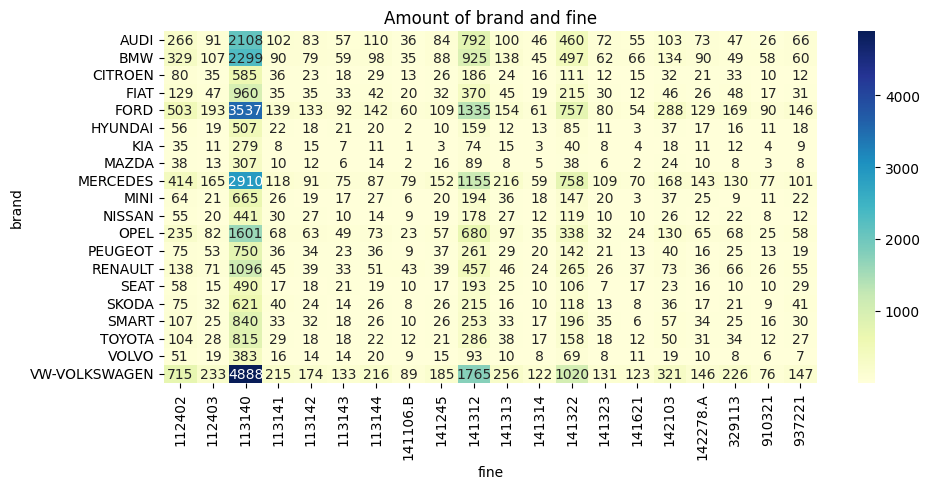

In [93]:
top_fines = df2018['fine'].value_counts().head(20).index
top_brands = df2018['brand'].value_counts().head(20).index

filtered18= df2018[df2018['fine'].isin(top_fines)]
filtered18= filtered18[filtered18['brand'].isin(top_brands)]

filtered18 = filtered18.groupby(['brand', 'fine']).size().reset_index(name='amount')
filtered18 = filtered18.sort_values('amount', ascending=False)

print(filtered18)

pivot_table = filtered18.pivot_table(values='amount', index='brand', columns='fine', fill_value=0)

plt.figure(figsize=(10, 5))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.xlabel('fine')
plt.ylabel('brand')
plt.title('Amount of brand and fine')
plt.tight_layout()
plt.show()

## Did something change from 2016 to 2018?
To answer our initial question, +++++ was used to ++++.

This gives us +++

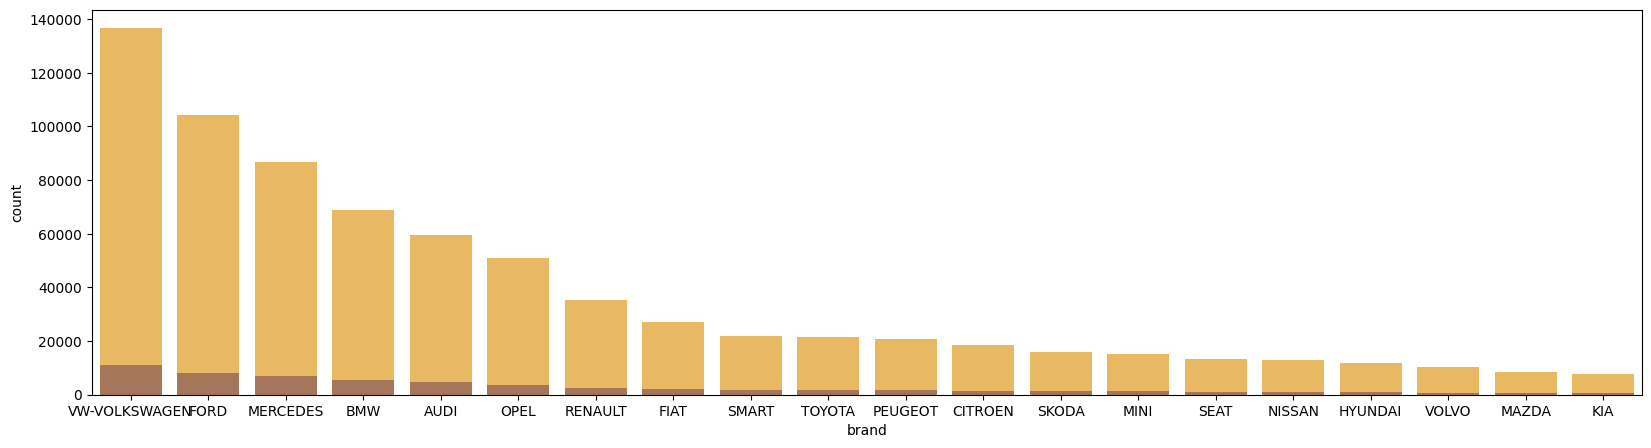

In [108]:
f, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x='brand', data=df2018, order=df2018['brand'].value_counts().head(20).index, color='blue')
sns.countplot(x='brand', data=df2016, order=df2016['brand'].value_counts().head(20).index, color='orange', alpha=0.7)

plt.show()



### Findings
Probably different amount of data (2016:??? & 2018: ????)

### Limitations
Since the dataset did hold nominal data it was not possible to analyze statistical values like mean, correlation, varianz, minimum or maximum. 
Besides the data features itself, only data from on month of the year was evaluated. To support the findings the data of different years should be considered as well as maybe looking at other months or the whole year.
Another thing to point out is the completeness of the data and its quality might effect the validity.
